# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

# !python -m pip install -r requirements.txt
!pip install ipywidgets==8.1.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


**Important: Restart the Kernel at this moment**

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transformer = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
train_set= torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transformer)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='./data', train=False, transform=transformer, download=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.90MB/s]


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [5]:
print(next(iter(train_loader)))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

The taining set has 60000 images and its 5 random images are visualized as below:
1


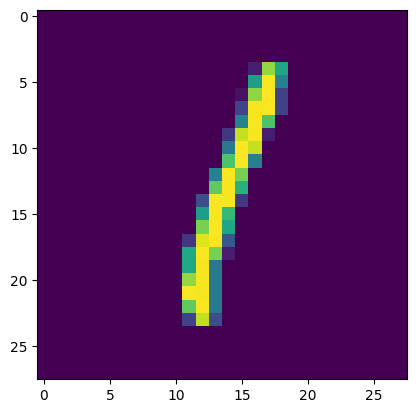

3


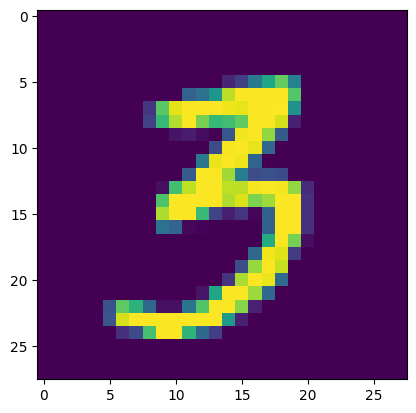

6


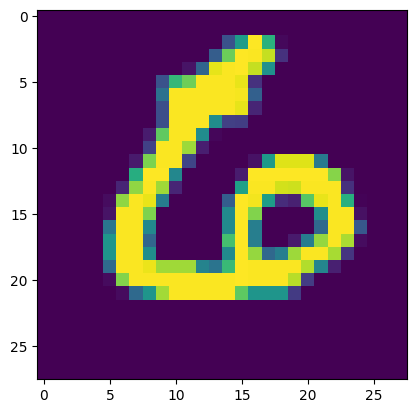

6


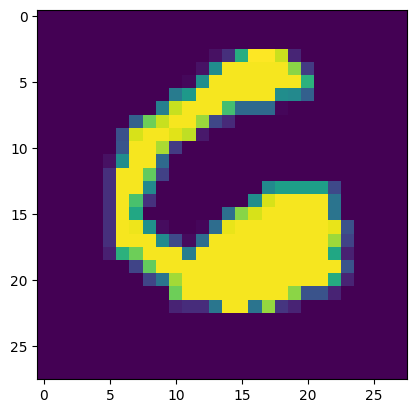

3


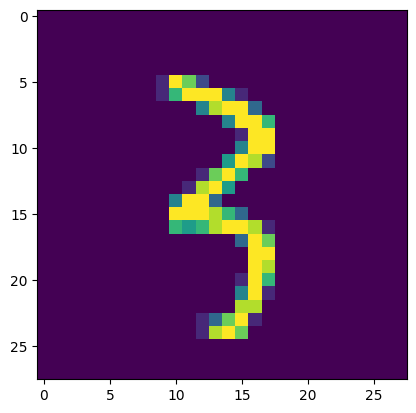

The test set has 10000 images and its 5 random images are visualized as below:
7


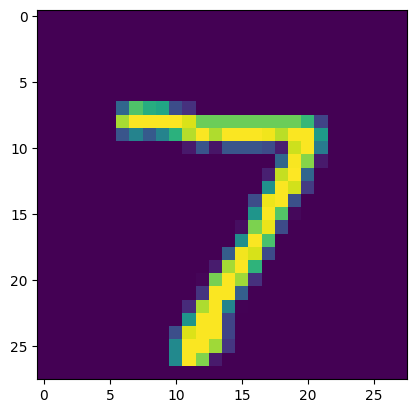

2


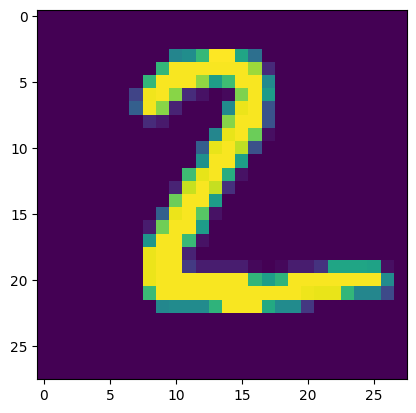

1


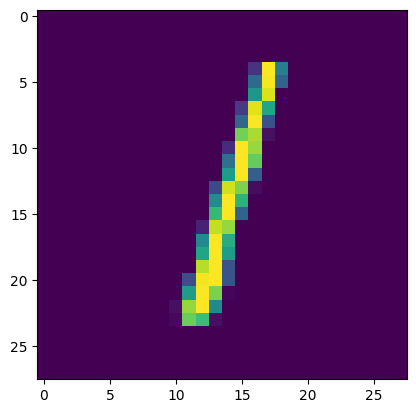

0


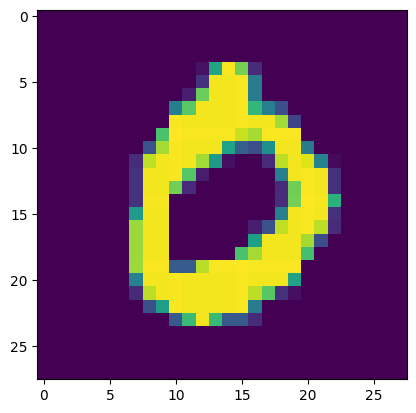

4


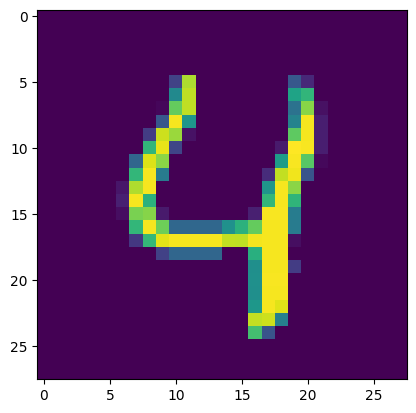

In [6]:
# Explore data
print("The taining set has", len(train_set), "images and its 5 random images are visualized as below:")
show5(train_loader)

print("The test set has", len(test_set), "images and its 5 random images are visualized as below:")
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:

class FlexibleCNN(nn.Module):
    """
    A flexible Convolutional Neural Network class where the architecture
    can be defined by passing hyperparameters during instantiation.
    """
    def __init__(self, channels_c1, channels_c2, hidden_features, dropout_p, num_classes=10):
        """
        Args:
            channels_c1 (int): Number of output channels for the first Conv layer.
            channels_c2 (int): Number of output channels for the second Conv layer.
            hidden_features (int): Number of features in the hidden linear layer.
            dropout_p (float): Probability for the Dropout layer (between 0 and 1).
            num_classes (int): Number of output classes for the final layer.
        """
        super(FlexibleCNN, self).__init__()

        # --- Convolutional Stack ---
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=channels_c1, kernel_size=3, padding=1),
            nn.BatchNorm2d(channels_c1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(in_channels=channels_c1, out_channels=channels_c2, kernel_size=3, padding=1),
            nn.BatchNorm2d(channels_c2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # --- Classifier Stack ---
        # The input features to the linear layer must be calculated dynamically.
        # For a 28x28 input image, after two MaxPool2d layers (kernel_size=2),
        # the spatial dimension becomes 7x7.
        linear_input_features = channels_c2 * 7 * 7

        self.classifier_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=linear_input_features, out_features=hidden_features),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(in_features=hidden_features, out_features=num_classes)
        )

    def forward(self, x):
        x = self.conv_stack(x)
        x = self.classifier_stack(x)
        return x

In [8]:
# --- Model Architecture Hyperparameters ---
# Define the architecture in a dictionary for clarity and ease of use.

hparams = {
    'channels_c1': 32,
    'channels_c2': 64,
    'hidden_features': 128,
    'dropout_p': 0.5,
    'num_classes': 10  # Determined by the dataset
}

model = FlexibleCNN(**hparams)

# printing the model to verify the architecture is as expected
print("\nModel Architecture:")
print(model)



Model Architecture:
FlexibleCNN(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
## Loss Function
# CrossEntropyLoss is ideal for multi-class classification problems. It internally applies a LogSoftmax and a Negative Log-Likelihood Loss.

criterion = nn.CrossEntropyLoss()


## Optimizer
# Adam is a popular and effective optimization algorithm.

optimizer = optim.Adam(model.parameters(), lr=0.001)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
# Instantiate the model and move it to the configured device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

FlexibleCNN(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [12]:
from tqdm import tqdm #  for a nice progress bar

#  Training Loop
def model_training(num_epochs,train_loader, device, model, criterion, optimizer ):
    print("\nStarting Training...")
    total_steps = len(train_loader)
    epoch_losses = [] # List to record the average loss of each epoch

    for epoch in range(num_epochs):
        running_loss = 0.0
        # Use tqdm for a progress bar over the training loader
        for i, (images, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            # --- Move data and model to the same device ---
            images = images.to(device)
            labels = labels.to(device)

            # --- Forward pass ---
            outputs = model(images)
            loss = criterion(outputs, labels)

            # --- Backward and optimize ---
            optimizer.zero_grad()   # Clear gradients from previous step
            loss.backward()         # Backpropagate the loss
            optimizer.step()        # Update the model's weights

            # Accumulate the loss for the entire epoch
            # .item() gets the raw Python number from the tensor
            running_loss += loss.item()

        # --- After each epoch ---
        # Calculate the average loss for this epoch
        average_epoch_loss = running_loss / total_steps
        epoch_losses.append(average_epoch_loss)

        # Print the summary for the epoch
        print(f"Epoch [{epoch+1}/{num_epochs}] completed. Average Loss: {average_epoch_loss:.4f}")

    print("\nFinished Training!")
    print(f"Recorded average losses per epoch: {epoch_losses}")
    return epoch_losses

In [13]:
num_epochs = 5
epochLosses = model_training(num_epochs, train_loader, device, model, criterion, optimizer)


Starting Training...


Epoch 1/5: 100%|██████████| 600/600 [00:09<00:00, 63.42it/s]


Epoch [1/5] completed. Average Loss: 0.2207


Epoch 2/5: 100%|██████████| 600/600 [00:08<00:00, 68.65it/s]


Epoch [2/5] completed. Average Loss: 0.0967


Epoch 3/5: 100%|██████████| 600/600 [00:08<00:00, 69.08it/s]


Epoch [3/5] completed. Average Loss: 0.0770


Epoch 4/5: 100%|██████████| 600/600 [00:08<00:00, 70.61it/s]


Epoch [4/5] completed. Average Loss: 0.0642


Epoch 5/5: 100%|██████████| 600/600 [00:08<00:00, 72.41it/s]

Epoch [5/5] completed. Average Loss: 0.0566

Finished Training!
Recorded average losses per epoch: [0.2207377396368732, 0.096663602256837, 0.07703685717036327, 0.06420690007663021, 0.05660405043900634]


Plot the training loss (and validation loss/accuracy, if recorded).

In [14]:
def plot_loss(num_epochs,epoch_losses):
    # Create a list of epoch numbers for the x-axis
    epochs = range(1, num_epochs + 1)

    # Plot the training loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, epoch_losses, 'g-', label='Training Loss') # 'g-' for a solid green line
    plt.title('Training Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

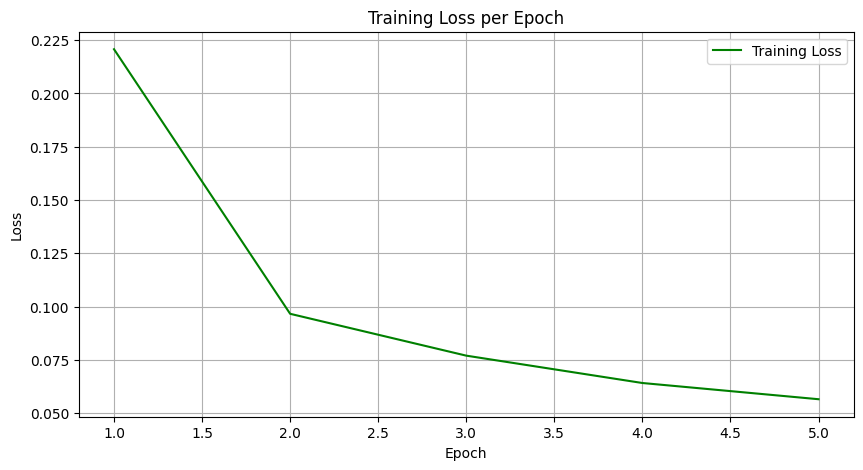

In [15]:
plot_loss(num_epochs,epochLosses)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [16]:
## Model Evaluation
def model_evaluation(test_loader,device, model):
    # In test phase, we don't need to compute gradients (for memory efficiency)
    print("\nEvaluating on Test Set...")
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            # torch.max returns (value, index)
            # We only care about the index of the highest value, which is our prediction
            _, predicted = torch.max(outputs.data, 1)

            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

        accuracy = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the {len(test_loader)} test images: {accuracy:.2f} %')
        return accuracy

In [17]:
Accuracy = model_evaluation(test_loader,device, model)


Evaluating on Test Set...
Accuracy of the network on the 100 test images: 98.24 %


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [18]:
# Architecture for Modified CNN
hparams_mod = {
    'channels_c1': 64,      # Increased from 32
    'channels_c2': 128,     # Increased from 64
    'hidden_features': 256, # Increased from 128
    'dropout_p': 0.3,       # Decreased from 0.5
    'num_classes': 10
}

model_improved = FlexibleCNN(**hparams_mod)
model_improved.to(device)
print("\nModified Model Architecture:")
print(model_improved)


Modified Model Architecture:
FlexibleCNN(
  (conv_stack): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [23]:
# Training improved model
optimizer = optim.Adam(model_improved.parameters(), lr=0.001)
num_epochs = 7
epochLoss_mod = model_training(num_epochs, train_loader, device, model_improved, criterion, optimizer)


Starting Training...


Epoch 1/7: 100%|██████████| 600/600 [00:09<00:00, 61.68it/s]


Epoch [1/7] completed. Average Loss: 0.1709


Epoch 2/7: 100%|██████████| 600/600 [00:10<00:00, 58.56it/s]


Epoch [2/7] completed. Average Loss: 0.0613


Epoch 3/7: 100%|██████████| 600/600 [00:09<00:00, 61.72it/s]


Epoch [3/7] completed. Average Loss: 0.0487


Epoch 4/7: 100%|██████████| 600/600 [00:09<00:00, 62.16it/s]


Epoch [4/7] completed. Average Loss: 0.0411


Epoch 5/7: 100%|██████████| 600/600 [00:09<00:00, 62.32it/s]


Epoch [5/7] completed. Average Loss: 0.0353


Epoch 6/7: 100%|██████████| 600/600 [00:09<00:00, 64.82it/s]


Epoch [6/7] completed. Average Loss: 0.0304


Epoch 7/7: 100%|██████████| 600/600 [00:09<00:00, 61.53it/s]

Epoch [7/7] completed. Average Loss: 0.0263

Finished Training!
Recorded average losses per epoch: [0.17090670745664588, 0.06127855093839268, 0.04871378661870646, 0.04107142021957164, 0.035300736056863874, 0.030396191623488753, 0.026271538506116486]


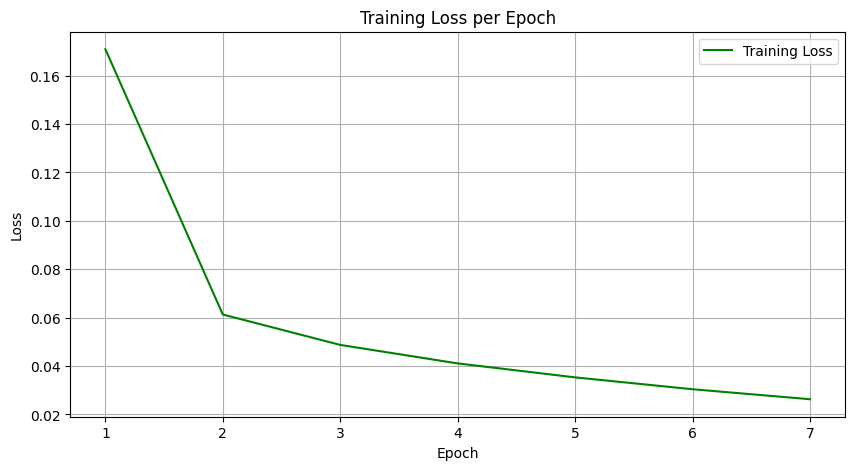

In [24]:
# Plotting training loss of improved model
plot_loss(num_epochs,epochLoss_mod)

In [25]:
Accuracy_mod = model_evaluation(test_loader,device, model_improved)


Evaluating on Test Set...
Accuracy of the network on the 100 test images: 98.51 %


## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
torch.save(model_improved.state_dict(), 'improved_model.pth')